In [2]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import math
import pandas as pd
import statistics as st

In [3]:
def clap_pos(clap_array, samplingFreq, timeArray, pingValues): #PING INPUT HERE
    max_clap_sec = 15                                #Maximum number of claps allowed in a second
    N = math.ceil(samplingFreq/(8000*max_clap_sec))
    cumsum, moving_aves = [0], []
    #ping_error, average_ping = 0
    
    result = {
        "clap_array" : clap_array,
        "clap_index" : [],
        "time_array" : timeArray,
        "pingValues" : pingValues,
        "num_of_claps": []
    }
    
    for i, x in enumerate(abs(clap_array), 1):
        cumsum.append(cumsum[i - 1] + x)
        if i >= N:
            moving_ave = (cumsum[i] - cumsum[i - N])/N
            moving_aves.append(moving_ave)
    
    
    moving_aves = np.array(moving_aves)
    thresh = moving_aves.mean()
    indices = find_peaks(moving_aves, threshold=thresh)[0]
    
    pos_indices = []
    min_height_indices = []
    corrected_indices = []
    
    for i in range(indices.__len__()):
        if moving_aves[indices[i]]>0:
            pos_indices.append(indices[i])
    
    if pos_indices.__len__() > 0:
       min_height = 0.8 * min(moving_aves[pos_indices])
    else:
        return result
    
    for i in range(pos_indices.__len__()):
        if moving_aves[pos_indices[i]] > min_height:
            min_height_indices.append(pos_indices[i])
            
    print(min_height_indices)
    
    time_len = timeArray.__len__()
    if time_len > 0:
        time_index_ratio = (timeArray[time_len - 1] - timeArray[0])/time_len
    else:
        return result
    
    min_gap = math.ceil(1/(max_clap_sec*time_index_ratio))
    
    j = 0
    for i in range(min_height_indices.__len__()):
        temp = min_height_indices[i]
        if i == 0:
            corrected_indices.append(temp)
        elif temp - corrected_indices[j] > min_gap:
            corrected_indices.append(temp)
            j += 1
        
    for i in range(corrected_indices.__len__()):
        corrected_indices[i]=corrected_indices[i]-pingValues;
    
    
    num_of_claps = corrected_indices.__len__()
    result["clap_array"] = clap_array
    result["clap_index"] = corrected_indices
    result["time_array"] = timeArray
    result["num_of_claps"] = num_of_claps
    result["pingValues"] = pingValues
    

            
    return result

In [4]:
def clap_stats(clap_index, timeArray):
    clap_time_diff = []
    
    num_of_claps = clap_index.__len__()
    
    for i in range(0, num_of_claps - 1):
        clap_time_diff.append(timeArray[clap_index[i + 1]] - timeArray[clap_index[i]])
    
    arr = [timeArray[i] for i in clap_index]
        
    stats = {
        "mean" : np.array(clap_time_diff).mean(),
        "std" : np.array(clap_time_diff).std(),
        "diff": clap_time_diff,
        "clap_times": arr
    }
    
    return stats

In [5]:
def split_arrays(subject_clap_array, subject_time_array) :
    if((np.size(subject_clap_array)-np.size(subject_clap_array)%10) > 0):
        subject_clap_array_modified = np.delete(subject_clap_array, np.s_[(np.size(subject_clap_array)-np.size(subject_clap_array)%10):])
        split_clap_arrays = np.split(subject_clap_array_modified, 10)
    
    else :
        split_clap_arrays = np.split(subject_clap_array, 10)
        
    if((np.size(subject_time_array)-np.size(subject_time_array)%10) > 0):
        subject_time_array_modified = np.delete(subject_time_array, np.s_[(np.size(subject_time_array)-np.size(subject_time_array)%10):])
        split_time_arrays = np.split(subject_time_array_modified, 10)
    
    else :
        split_time_arrays = np.split(subject_time_array, 10)
        
    result = {
        "split_clap_arrays" : split_clap_arrays,
        "split_time_arrays" : split_time_arrays
    }
    
    return result

# IMPORT TRIPLETS

## Set 1: MulayAaditeeCliche

### 1. Mulay

array([0.00000000e+00, 2.08333406e-05, 4.16666811e-05, ...,
       5.99999583e+01, 5.99999792e+01, 6.00000000e+01])

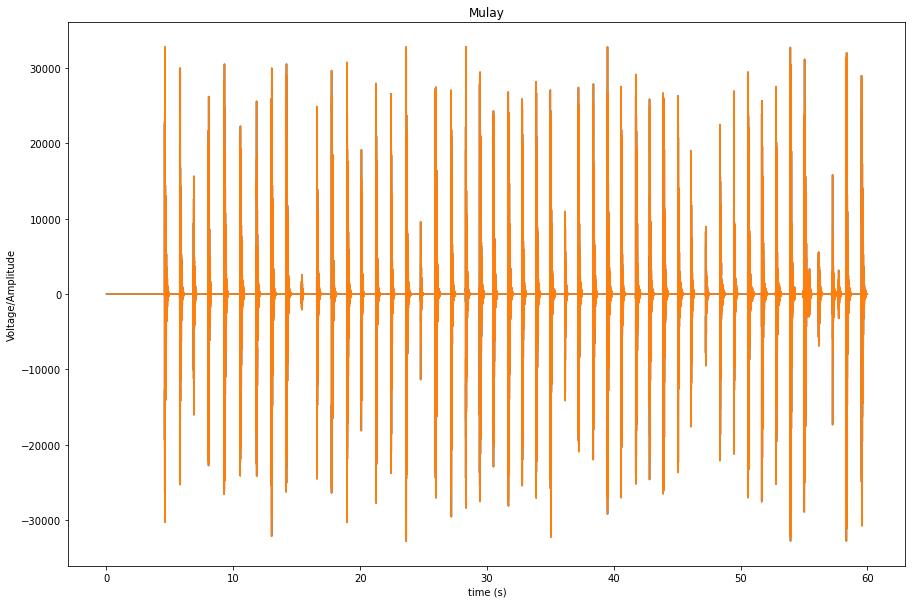

In [6]:
mulay_sampleRate, mulay_data = read("./Triplets/MulayAaditeeCliche/209033830-3_Applecider_3388.wav")
mulay_length = mulay_data.shape[0] / mulay_sampleRate
mulay_ping_values = 16
mulay_time = np.linspace(0., mulay_length, mulay_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(mulay_time, mulay_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Mulay")
#plt.margins(x=-0.2, y=0) 

mulay_clap_array = []           #this array stores the intensities for the median
for i in range(0, mulay_data.shape[0]):
    mulay_clap_array.append(mulay_data[i][0])
    
mulay_time

### 2. Aaditee

array([0.00000000e+00, 2.08333406e-05, 4.16666811e-05, ...,
       5.99921250e+01, 5.99921458e+01, 5.99921667e+01])

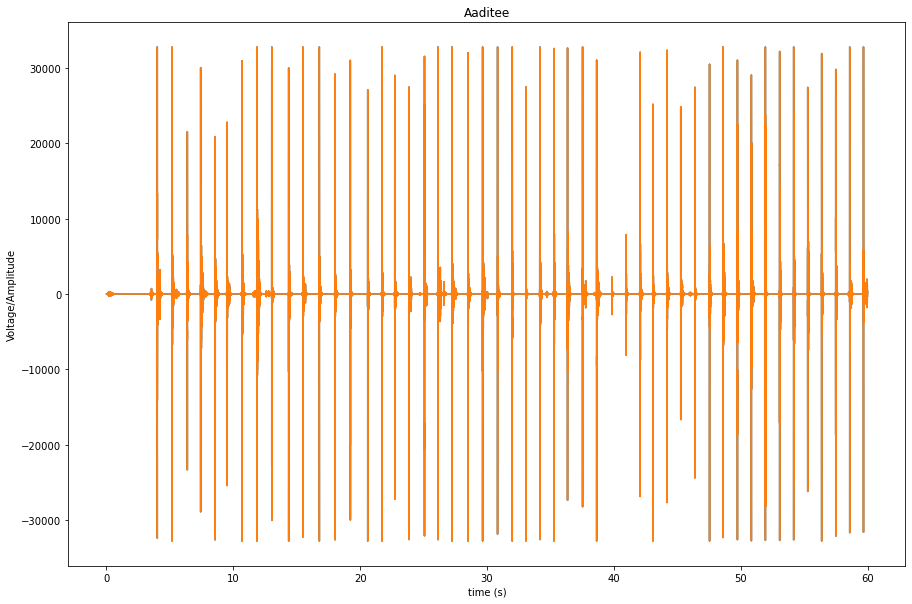

In [7]:
aaditee_sampleRate, aaditee_data = read("./Triplets/MulayAaditeeCliche/209033830-1_Krampus_4062.wav")
aaditee_length = aaditee_data.shape[0] / aaditee_sampleRate
aaditee_ping_values = 47
aaditee_time = np.linspace(0., aaditee_length, aaditee_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(aaditee_time, aaditee_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Aaditee")
#plt.margins(x=-0.2, y=0) 

aaditee_clap_array = []           #this array stores the intensities for aaditee
for i in range(0, aaditee_data.shape[0]):
    aaditee_clap_array.append(aaditee_data[i][0])
    
aaditee_time

### 3. Cliche

array([0.00000000e+00, 2.08333406e-05, 4.16666811e-05, ...,
       5.99785417e+01, 5.99785625e+01, 5.99785833e+01])

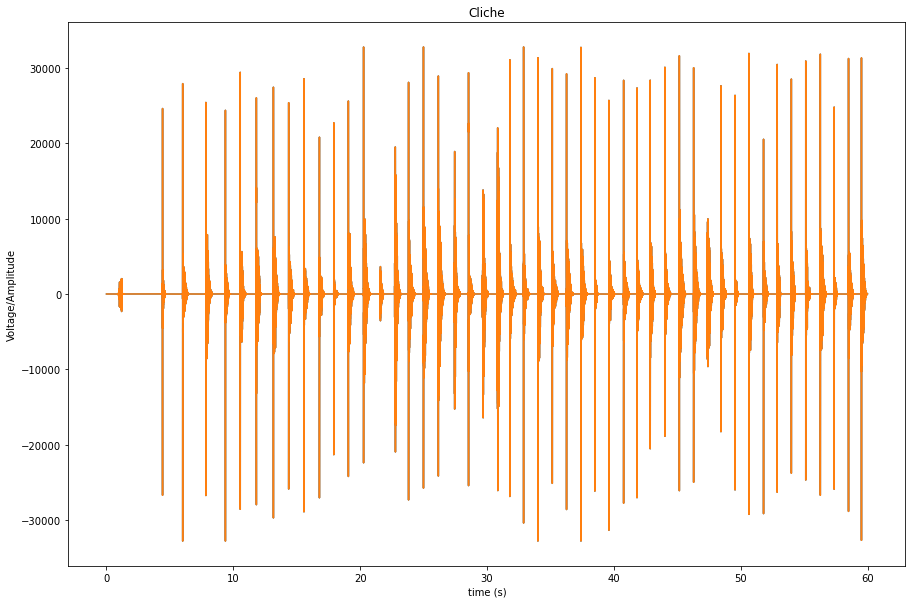

In [8]:
cliche_sampleRate, cliche_data = read("./Triplets/MulayAaditeeCliche/209033830-2_clicheduh_1904.wav")
cliche_length = cliche_data.shape[0] / cliche_sampleRate
cliche_ping_values = 18
cliche_time = np.linspace(0., cliche_length, cliche_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(cliche_time, cliche_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Cliche")
#plt.margins(x=-0.2, y=0) 

cliche_clap_array = []           #this array stores the intensities for cliche
for i in range(0, cliche_data.shape[0]):
    cliche_clap_array.append(cliche_data[i][0])
    
cliche_time

## Set 2: KKAmanPDS

### 1. KK

array([0.00000000e+00, 2.08333409e-05, 4.16666817e-05, ...,
       5.75851667e+01, 5.75851875e+01, 5.75852083e+01])

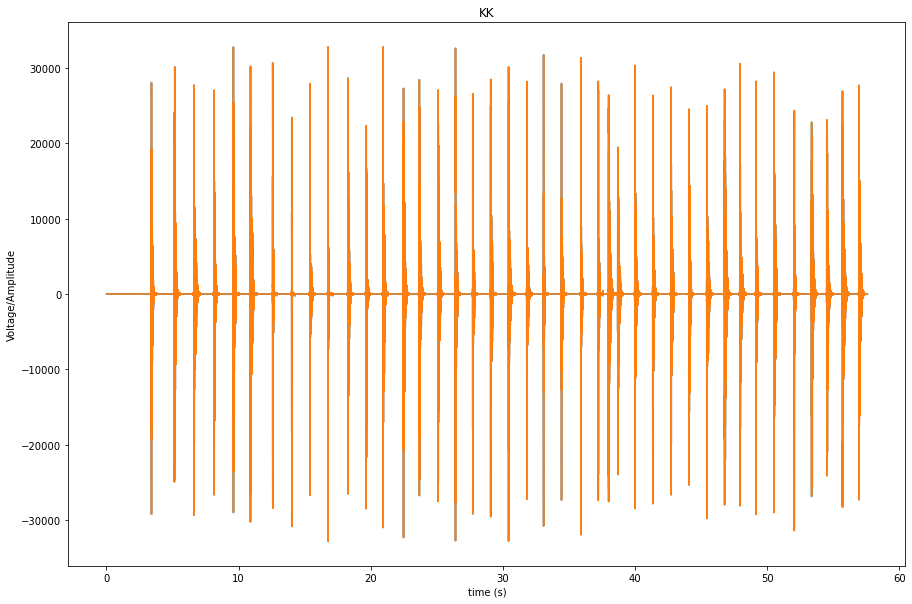

In [9]:
kk_sampleRate, kk_data = read("./Triplets/KKAmanPDS/736054688-3_madd_scientist_3257.wav")
kk_length = kk_data.shape[0] / kk_sampleRate
kk_ping_values = 215
kk_time = np.linspace(0., kk_length, kk_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(kk_time, kk_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("KK")
#plt.margins(x=-0.2, y=0) 

kk_clap_array = []           #this array stores the intensities for KK
for i in range(0, kk_data.shape[0]):
    kk_clap_array.append(kk_data[i][0])
    
kk_time

### 2. Aman

array([0.00000000e+00, 2.08333409e-05, 4.16666817e-05, ...,
       5.76098125e+01, 5.76098333e+01, 5.76098542e+01])

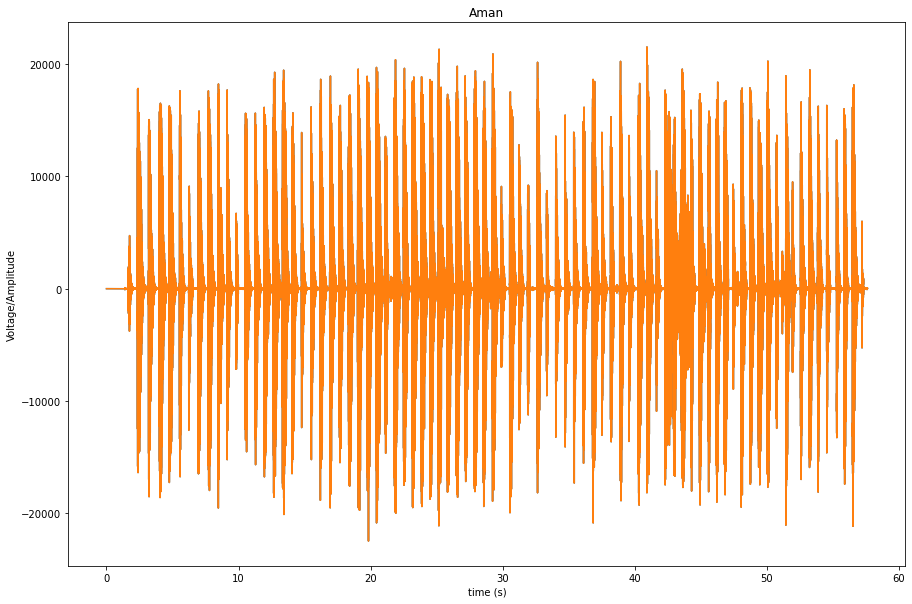

In [10]:
aman_sampleRate, aman_data = read("./Triplets/KKAmanPDS/736054688-2_zzz123_3836.wav")
aman_length = aman_data.shape[0] / aman_sampleRate
aman_ping_values = 44
aman_time = np.linspace(0., aman_length, aman_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(aman_time, aman_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("Aman")
#plt.margins(x=-0.2, y=0) 

aman_clap_array = []           #this array stores the intensities for Aman
for i in range(0, aman_data.shape[0]):
    aman_clap_array.append(aman_data[i][0])
    
aman_time

### 3. PDS

array([0.00000000e+00, 2.08333409e-05, 4.16666817e-05, ...,
       5.75846458e+01, 5.75846667e+01, 5.75846875e+01])

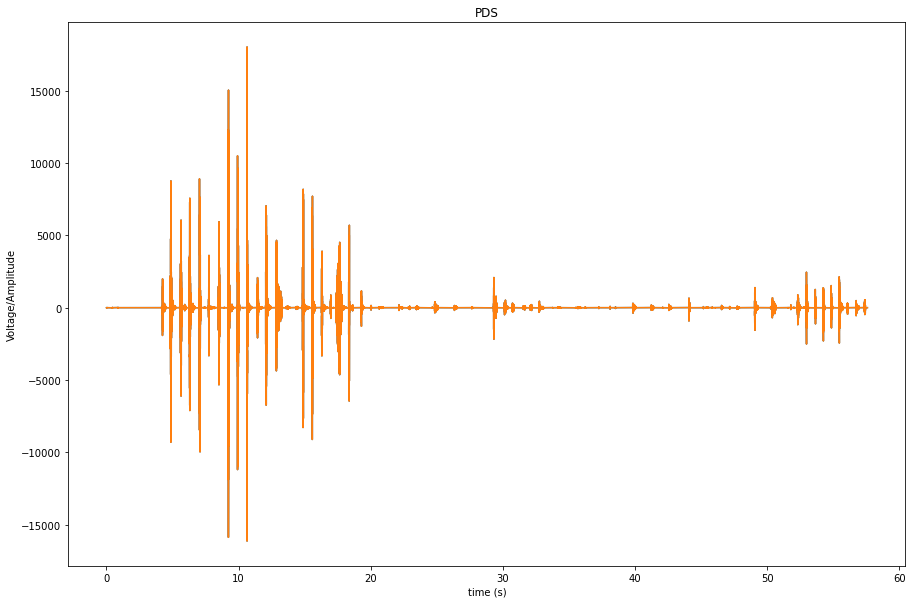

In [11]:
pds_sampleRate, pds_data = read("./Triplets/KKAmanPDS/736054688-1_pds_7486.wav")
pds_length = pds_data.shape[0] / pds_sampleRate
pds_ping_values = 77
pds_time = np.linspace(0., pds_length, pds_data.shape[0])

plt.figure(figsize=(15,10))
plt.plot(pds_time, pds_data)
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.title("PDS")
#plt.margins(x=-0.2, y=0) 

pds_clap_array = []           #this array stores the intensities for PDS
for i in range(0, pds_data.shape[0]):
    pds_clap_array.append(pds_data[i][0])
    
pds_time

## Graph Set 1

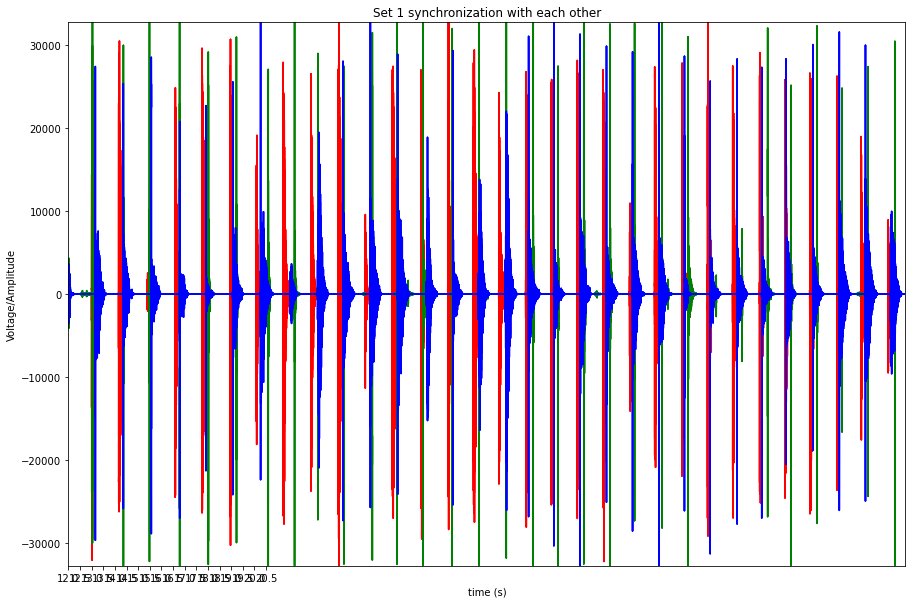

In [12]:
plt.figure(figsize=(15, 10))
plt.plot(mulay_time, mulay_data, color='r')
plt.plot(aaditee_time, aaditee_data, color='g')
plt.plot(cliche_time, cliche_data, color='b')
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.xticks(np.arange(0, 21, 0.5))
plt.title('Set 1 synchronization with each other')
plt.margins(x=-0.2, y=0)
plt.show()

## Graph Set 2

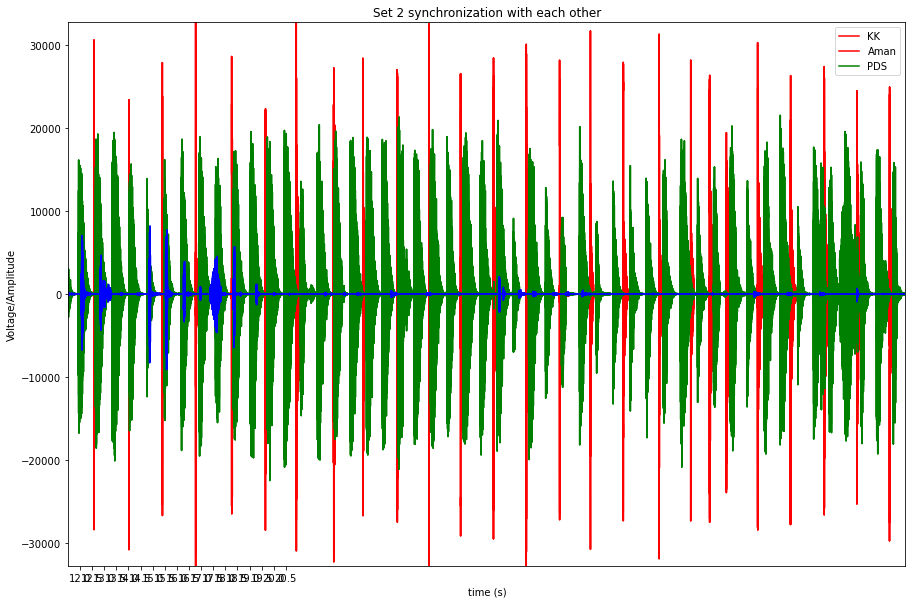

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(kk_time, kk_data, color='r')
plt.plot(aman_time, aman_data, color='g')
plt.plot(pds_time, pds_data, color='b')
plt.xlabel("time (s)")
plt.ylabel("Voltage/Amplitude")
plt.xticks(np.arange(0, 21, 0.5))
plt.title('Set 2 synchronization with each other')
plt.legend(['KK', 'Aman', 'PDS'])
plt.margins(x=-0.2, y=0)
plt.show()